#  Student Success Factors Analysis
## Identifying Key Drivers of Academic Achievement

**Objective:** Analyze student performance data to identify factors that contribute to academic success and build a predictive model for exam scores.

**Key Questions:**
- What factors most strongly correlate with student exam scores?
- How do study habits impact academic performance?
- Can we predict student exam scores based on these factors?


## Import Libraries 

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set visualisation style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size'] = 10

## Generate Sample Student Dataset
Creating a realistic dataset with the specified features

In [32]:
# Set random seed for reproducibility
np.random.seed(42)

# Number of students
n_students = 1000

# Generate student data
data = {
    'Hours_Studied': np.random.randint(1, 45, n_students),
    'Attendance': np.random.randint(50, 100, n_students),
    'Parental_Involvement': np.random.choice(['Low', 'Medium', 'High'], n_students, p=[0.25, 0.45, 0.30]),
    'Access_to_Resources': np.random.choice(['Low', 'Medium', 'High'], n_students, p=[0.20, 0.50, 0.30]),
    'Extracurricular_Activities': np.random.choice(['Yes', 'No'], n_students, p=[0.65, 0.35]),
    'Sleep_Hours': np.random.randint(4, 10, n_students),
    'Previous_Scores': np.random.randint(40, 100, n_students),
    'Motivation_Level': np.random.choice(['Low', 'Medium', 'High'], n_students, p=[0.20, 0.50, 0.30]),
    'Family_Income': np.random.choice(['Low', 'Medium', 'High'], n_students, p=[0.25, 0.50, 0.25]),
    'Teacher_Quality': np.random.choice(['Low', 'Medium', 'High'], n_students, p=[0.15, 0.55, 0.30]),
    'School_Type': np.random.choice(['Public', 'Private'], n_students, p=[0.70, 0.30]),
    'Peer_Influence': np.random.choice(['Positive', 'Neutral', 'Negative'], n_students, p=[0.40, 0.45, 0.15]),
    'Physical_Activity': np.random.randint(0, 7, n_students),
    'Learning_Disabilities': np.random.choice(['Yes', 'No'], n_students, p=[0.15, 0.85]),
    'Parental_Education_Level': np.random.choice(['High School', 'College', 'Postgraduate'], n_students, p=[0.40, 0.45, 0.15]),
    'Distance_from_Home': np.random.choice(['Near', 'Moderate', 'Far'], n_students, p=[0.40, 0.40, 0.20]),
    'Gender': np.random.choice(['Male', 'Female'], n_students),
}

df = pd.DataFrame(data)

# Generate exam scores based on realistic correlations
base_score = 10
score = base_score + \
        (df['Hours_Studied'] * 0.4) + \
        (df['Attendance'] * 0.3) + \
        (df['Previous_Scores'] * 0.15) + \
        (df['Sleep_Hours'] * 1.5) + \
        (df['Physical_Activity'] * 0.3) + \
        np.random.normal(0, 6, n_students)

# Add categorical factor impacts
score += df['Parental_Involvement'].map({'Low': 0, 'Medium': 4, 'High': 8})
score += df['Access_to_Resources'].map({'Low': 0, 'Medium': 3, 'High': 6})
score += df['Extracurricular_Activities'].map({'No': 0, 'Yes': 3})
score += df['Motivation_Level'].map({'Low': 0, 'Medium': 5, 'High': 10})
score += df['Family_Income'].map({'Low': 0, 'Medium': 3, 'High': 6})
score += df['Teacher_Quality'].map({'Low': 0, 'Medium': 4, 'High': 8})
score += df['School_Type'].map({'Public': 0, 'Private': 5})
score += df['Peer_Influence'].map({'Negative': -5, 'Neutral': 0, 'Positive': 5})
score += df['Learning_Disabilities'].map({'Yes': -8, 'No': 0})
score += df['Parental_Education_Level'].map({'High School': 0, 'College': 4, 'Postgraduate': 8})
score += df['Distance_from_Home'].map({'Near': 3, 'Moderate': 0, 'Far': -3})

# Clip scores between 0 and 100
df['Exam_Score'] = np.clip(score, 0, 100).round(1)

In [33]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,39,88,High,Medium,Yes,9,65,High,Low,Medium,Public,Positive,5,No,High School,Near,Male,100.0
1,29,55,Medium,Low,Yes,4,77,High,High,Medium,Public,Positive,3,No,Postgraduate,Far,Female,92.1
2,15,55,Medium,Medium,Yes,8,77,Medium,High,High,Public,Positive,3,No,College,Near,Male,100.0
3,43,52,Medium,Low,No,7,93,Medium,Medium,Medium,Public,Negative,1,No,College,Moderate,Male,78.5
4,8,56,Medium,High,Yes,4,83,Low,Medium,Medium,Public,Neutral,1,No,High School,Moderate,Female,74.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,33,94,Low,High,Yes,5,88,Medium,Low,High,Public,Neutral,6,No,High School,Far,Female,91.5
996,2,72,Medium,High,Yes,9,42,Medium,High,Medium,Private,Neutral,1,No,College,Near,Female,90.0
997,14,96,Low,Medium,No,7,49,Medium,High,Medium,Private,Neutral,6,No,College,Near,Female,93.5
998,40,80,Medium,High,No,4,44,Medium,High,Low,Public,Positive,0,No,College,Moderate,Female,86.0


In [34]:
# Save Generated Dataset to CSV
df.to_csv('student_data.csv',index=False)

## Data Exploration 

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Hours_Studied               1000 non-null   int32  
 1   Attendance                  1000 non-null   int32  
 2   Parental_Involvement        1000 non-null   object 
 3   Access_to_Resources         1000 non-null   object 
 4   Extracurricular_Activities  1000 non-null   object 
 5   Sleep_Hours                 1000 non-null   int32  
 6   Previous_Scores             1000 non-null   int32  
 7   Motivation_Level            1000 non-null   object 
 8   Family_Income               1000 non-null   object 
 9   Teacher_Quality             1000 non-null   object 
 10  School_Type                 1000 non-null   object 
 11  Peer_Influence              1000 non-null   object 
 12  Physical_Activity           1000 non-null   int32  
 13  Learning_Disabilities       1000 n

In [36]:
# Show statistics description of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,1000.0,22.5150,12.611059,1.0,12.0,23.0,33.0,44.0
Attendance,1000.0,74.9350,14.184004,50.0,63.0,75.0,87.0,99.0
Sleep_Hours,1000.0,6.4460,1.736692,4.0,5.0,6.0,8.0,9.0
Previous_Scores,1000.0,69.6470,17.407970,40.0,55.0,70.0,84.0,99.0
Physical_Activity,1000.0,2.9890,2.002721,0.0,1.0,3.0,5.0,6.0
Exam_Score,1000.0,88.3882,10.383242,49.3,81.3,90.1,98.4,100.0


In [37]:
# Show uniques values
df.nunique()

Hours_Studied                  44
Attendance                     50
Parental_Involvement            3
Access_to_Resources             3
Extracurricular_Activities      2
Sleep_Hours                     6
Previous_Scores                60
Motivation_Level                3
Family_Income                   3
Teacher_Quality                 3
School_Type                     2
Peer_Influence                  3
Physical_Activity               7
Learning_Disabilities           2
Parental_Education_Level        3
Distance_from_Home              3
Gender                          2
Exam_Score                    305
dtype: int64

In [38]:
# Check missing values
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

## Data Vizualitation
### 1. Exam Score Distribution

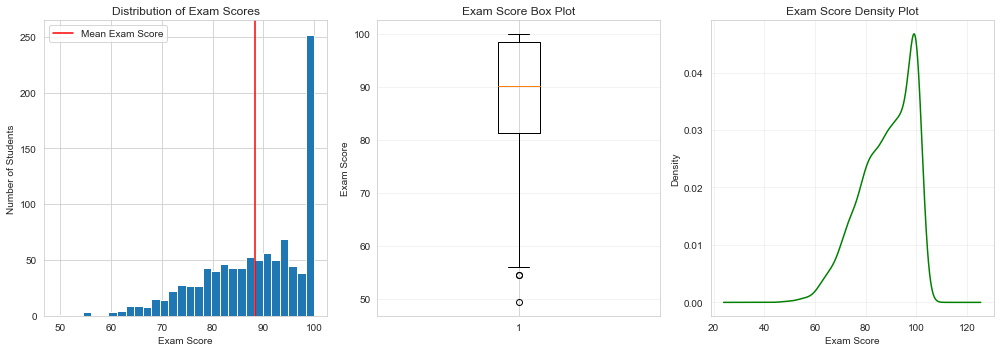

In [49]:
plt.figure(figsize=(14,5))

# Histogram
plt.subplot(1,3,1)
plt.hist(df['Exam_Score'], bins=30)
plt.axvline(df['Exam_Score'].mean(), color='red',label='Mean Exam Score')
plt.xlabel('Exam Score')
plt.ylabel('Number of Students')
plt.title('Distribution of Exam Scores')
plt.legend()

# Boxplot
plt.subplot(1,3,2)
plt.boxplot(df['Exam_Score'], vert=True)
plt.ylabel('Exam Score')
plt.title('Exam Score Box Plot')
plt.grid(axis='y', alpha=0.3)

# KDE plot
plt.subplot(1,3,3)
df['Exam_Score'].plot(kind='kde',color='green')
plt.xlabel('Exam Score')
plt.ylabel('Density')
plt.title('Exam Score Density Plot')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

### 2. Study Hours vs Exam Score

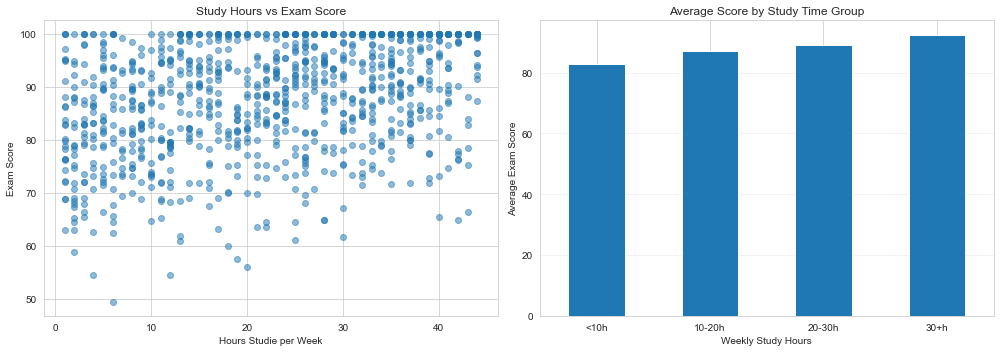

In [51]:
plt.figure(figsize=(14,5))

# Scatter Plot
plt.subplot(1,2,1)
plt.scatter(df['Hours_Studied'],df['Exam_Score'],alpha=0.5)
plt.xlabel('Hours Studie per Week')
plt.ylabel('Exam Score')
plt.title('Study Hours vs Exam Score')

# Grouped Analysis
plt.subplot(1,2,2)
study_bins = [0, 10, 20, 30, 45]
study_labels = ['<10h', '10-20h', '20-30h','30+h']
df['Study_Group'] = pd.cut(df['Hours_Studied'], bins=study_bins, labels=study_labels)
study_avg = df.groupby('Study_Group')['Exam_Score'].mean()
study_avg.plot(kind='bar')
plt.xlabel('Weekly Study Hours')
plt.ylabel('Average Exam Score')
plt.title('Average Score by Study Time Group')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### 3. Motivational Level and Parental Involvment 

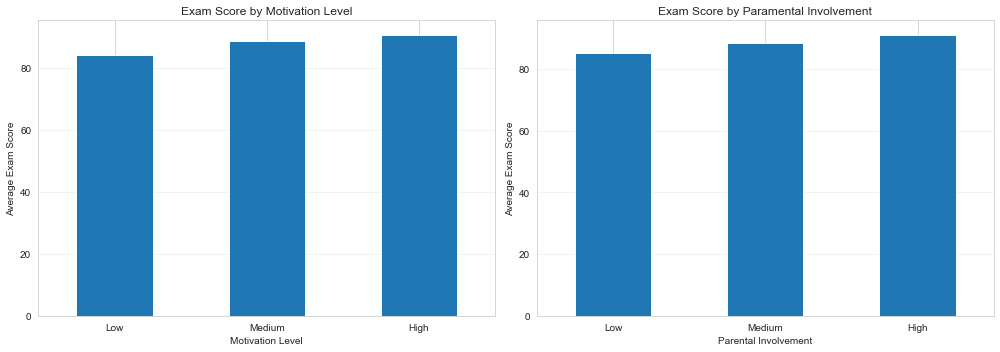

In [54]:
plt.figure(figsize=(14,5))

# Motivational Level
plt.subplot(1,2,1)
motiv_order = ['Low', 'Medium', 'High']
motiv_avg = df.groupby('Motivation_Level')['Exam_Score'].mean().reindex(motiv_order)
motiv_avg.plot(kind='bar')
plt.xlabel('Motivation Level')
plt.ylabel('Average Exam Score')
plt.title('Exam Score by Motivation Level')
plt.xticks(rotation=0)
plt.grid (axis='y',alpha=0.3)

#Parental Involvement
plt.subplot(1,2,2)
parent_order = ['Low', 'Medium', 'High']
parent_avg = df.groupby('Parental_Involvement')['Exam_Score'].mean().reindex(parent_order)
parent_avg.plot(kind='bar')
plt.xlabel('Parental Involvement')
plt.ylabel('Average Exam Score')
plt.title('Exam Score by Paramental Involvement')
plt.xticks(rotation=0)
plt.grid (axis='y',alpha=0.3)

plt.tight_layout()
plt.show()

### 4. Attendance Impact 

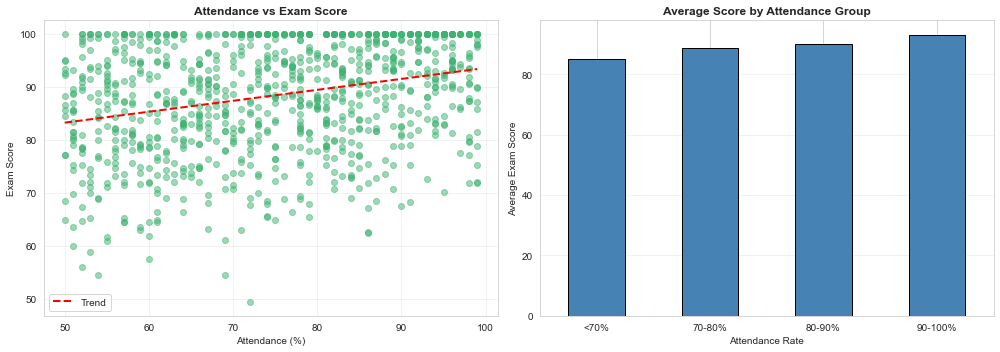

In [93]:
plt.figure(figsize=(14, 5))

# Scatter plot
plt.subplot(1, 2, 1)
plt.scatter(df['Attendance'], df['Exam_Score'], alpha=0.5, color='mediumseagreen')
plt.xlabel('Attendance (%)')
plt.ylabel('Exam Score')
plt.title('Attendance vs Exam Score', fontweight='bold')

# Trend line
z = np.polyfit(df['Attendance'], df['Exam_Score'], 1)
p = np.poly1d(z)
plt.plot(sorted(df['Attendance']), p(sorted(df['Attendance'])), 
         "r--", linewidth=2, label='Trend')
plt.legend()
plt.grid(alpha=0.3)

# Grouped analysis
plt.subplot(1, 2, 2)
attend_bins = [0, 70, 80, 90, 100]
attend_labels = ['<70%', '70-80%', '80-90%', '90-100%']
df['Attend_Group'] = pd.cut(df['Attendance'], bins=attend_bins, labels=attend_labels)
attend_avg = df.groupby('Attend_Group')['Exam_Score'].mean()
attend_avg.plot(kind='bar', color='steelblue', edgecolor='black')
plt.xlabel('Attendance Rate')
plt.ylabel('Average Exam Score')
plt.title('Average Score by Attendance Group', fontweight='bold')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### 5. Sleep Hours and Physical Activity

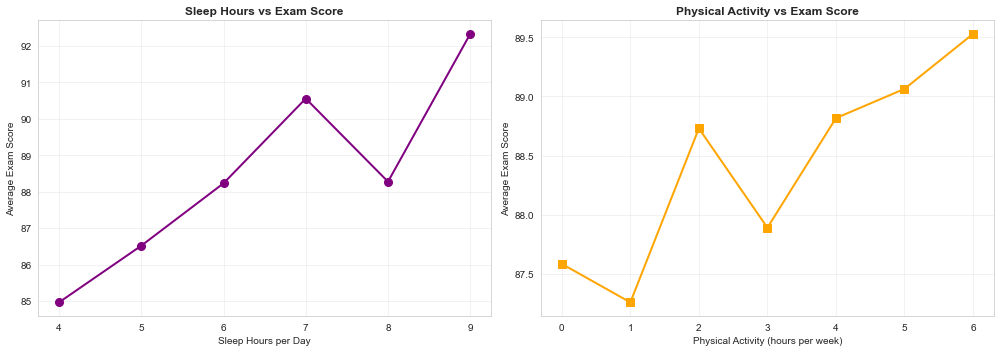

In [94]:
plt.figure(figsize=(14, 5))

# Sleep hours
plt.subplot(1, 2, 1)
sleep_avg = df.groupby('Sleep_Hours')['Exam_Score'].mean()
plt.plot(sleep_avg.index, sleep_avg.values, marker='o', linewidth=2, markersize=8, color='purple')
plt.xlabel('Sleep Hours per Day')
plt.ylabel('Average Exam Score')
plt.title('Sleep Hours vs Exam Score', fontweight='bold')
plt.grid(alpha=0.3)

# Physical activity
plt.subplot(1, 2, 2)
activity_avg = df.groupby('Physical_Activity')['Exam_Score'].mean()
plt.plot(activity_avg.index, activity_avg.values, marker='s', linewidth=2, markersize=8, color='orange')
plt.xlabel('Physical Activity (hours per week)')
plt.ylabel('Average Exam Score')
plt.title('Physical Activity vs Exam Score', fontweight='bold')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


### 6. Socioeconomic Factors

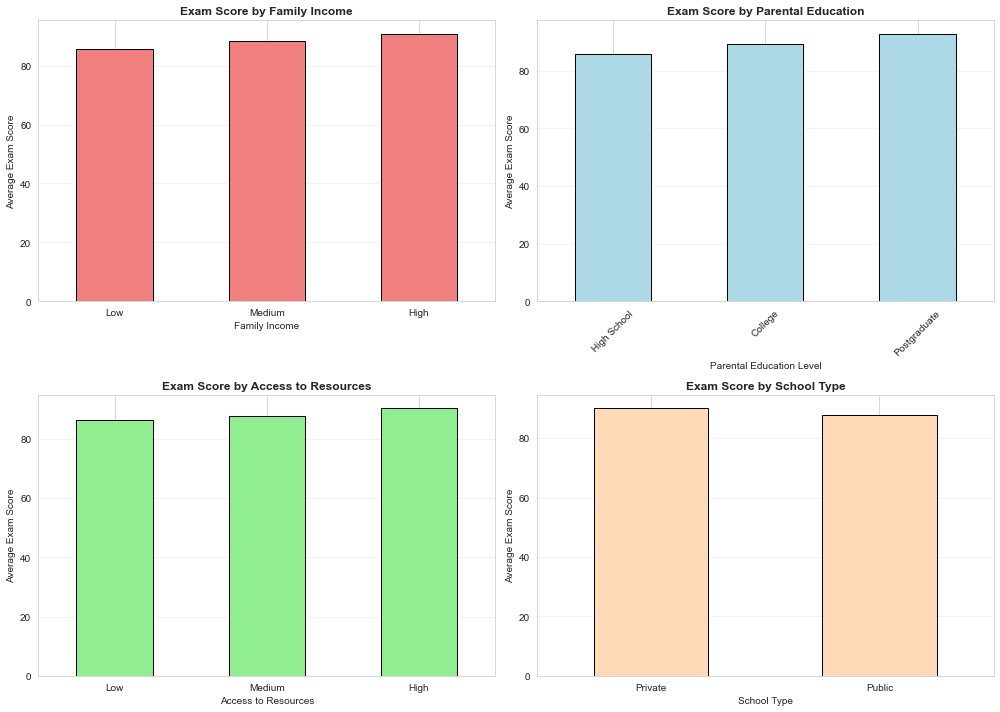

In [95]:
plt.figure(figsize=(14, 10))

# Family income
plt.subplot(2, 2, 1)
income_order = ['Low', 'Medium', 'High']
income_avg = df.groupby('Family_Income')['Exam_Score'].mean().reindex(income_order)
income_avg.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.xlabel('Family Income')
plt.ylabel('Average Exam Score')
plt.title('Exam Score by Family Income', fontweight='bold')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

# Parental education
plt.subplot(2, 2, 2)
edu_order = ['High School', 'College', 'Postgraduate']
edu_avg = df.groupby('Parental_Education_Level')['Exam_Score'].mean().reindex(edu_order)
edu_avg.plot(kind='bar', color='lightblue', edgecolor='black')
plt.xlabel('Parental Education Level')
plt.ylabel('Average Exam Score')
plt.title('Exam Score by Parental Education', fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Access to resources
plt.subplot(2, 2, 3)
resource_order = ['Low', 'Medium', 'High']
resource_avg = df.groupby('Access_to_Resources')['Exam_Score'].mean().reindex(resource_order)
resource_avg.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.xlabel('Access to Resources')
plt.ylabel('Average Exam Score')
plt.title('Exam Score by Access to Resources', fontweight='bold')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

# School type
plt.subplot(2, 2, 4)
school_avg = df.groupby('School_Type')['Exam_Score'].mean()
school_avg.plot(kind='bar', color='peachpuff', edgecolor='black')
plt.xlabel('School Type')
plt.ylabel('Average Exam Score')
plt.title('Exam Score by School Type', fontweight='bold')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### 7. Support Systems

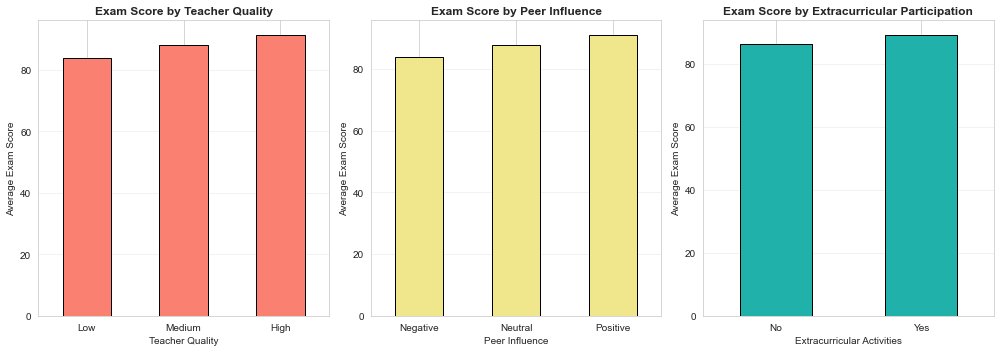

In [96]:
plt.figure(figsize=(14, 5))

# Teacher quality
plt.subplot(1, 3, 1)
teacher_order = ['Low', 'Medium', 'High']
teacher_avg = df.groupby('Teacher_Quality')['Exam_Score'].mean().reindex(teacher_order)
teacher_avg.plot(kind='bar', color='salmon', edgecolor='black')
plt.xlabel('Teacher Quality')
plt.ylabel('Average Exam Score')
plt.title('Exam Score by Teacher Quality', fontweight='bold')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

# Peer influence
plt.subplot(1, 3, 2)
peer_order = ['Negative', 'Neutral', 'Positive']
peer_avg = df.groupby('Peer_Influence')['Exam_Score'].mean().reindex(peer_order)
peer_avg.plot(kind='bar', color='khaki', edgecolor='black')
plt.xlabel('Peer Influence')
plt.ylabel('Average Exam Score')
plt.title('Exam Score by Peer Influence', fontweight='bold')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

# Extracurricular activities
plt.subplot(1, 3, 3)
extra_avg = df.groupby('Extracurricular_Activities')['Exam_Score'].mean()
extra_avg.plot(kind='bar', color='lightseagreen', edgecolor='black')
plt.xlabel('Extracurricular Activities')
plt.ylabel('Average Exam Score')
plt.title('Exam Score by Extracurricular Participation', fontweight='bold')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


### 8. Barriers to Success

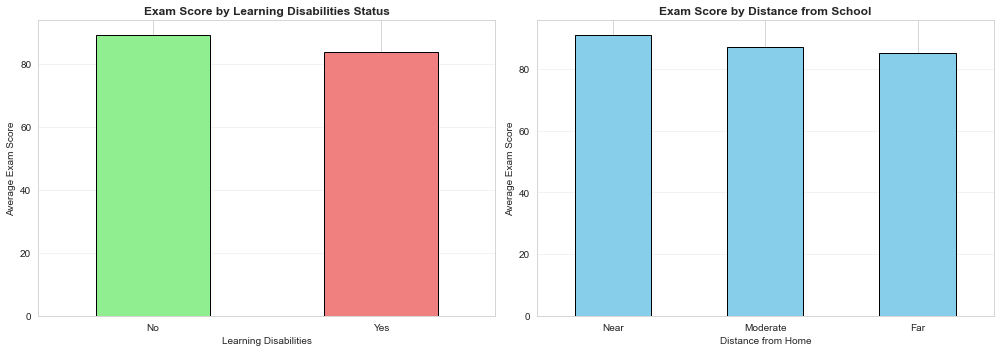

In [97]:
plt.figure(figsize=(14, 5))

# Learning disabilities
plt.subplot(1, 2, 1)
disability_avg = df.groupby('Learning_Disabilities')['Exam_Score'].mean()
disability_avg.plot(kind='bar', color=['lightgreen', 'lightcoral'], edgecolor='black')
plt.xlabel('Learning Disabilities')
plt.ylabel('Average Exam Score')
plt.title('Exam Score by Learning Disabilities Status', fontweight='bold')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

# Distance from home
plt.subplot(1, 2, 2)
distance_order = ['Near', 'Moderate', 'Far']
distance_avg = df.groupby('Distance_from_Home')['Exam_Score'].mean().reindex(distance_order)
distance_avg.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Distance from Home')
plt.ylabel('Average Exam Score')
plt.title('Exam Score by Distance from School', fontweight='bold')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### Correlation Analysis 

In [60]:
# Encode categorical variables
df_encoded = df.copy()

# Label Encoding for categorical variables
le = LabelEncoder()
categorical_features = ['Parental_Involvement', 'Access_to_Resources','Extracurricular_Activities', 'Motivation_Level','Family_Income','Teacher_Quality','School_Type','Peer_Influence','Learning_Disabilities','Parental_Education_Level','Distance_from_Home', 'Gender']

for col in categorical_features:
    df_encoded[col+ '_encoded'] = le.fit_transform(df_encoded[col])
    
# Select numerical coloumns for correlation
numerical_cols = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores','Physical_Activity', 'Exam_Score']
encoded_cols =[col + '_encoded' for col in categorical_features]
all_cols = numerical_cols + encoded_cols

# Calculate correlation matrix
correlation_matrix = df_encoded[all_cols].corr()
correlation_matrix

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Physical_Activity,Exam_Score,Parental_Involvement_encoded,Access_to_Resources_encoded,Extracurricular_Activities_encoded,Motivation_Level_encoded,Family_Income_encoded,Teacher_Quality_encoded,School_Type_encoded,Peer_Influence_encoded,Learning_Disabilities_encoded,Parental_Education_Level_encoded,Distance_from_Home_encoded,Gender_encoded
Hours_Studied,1.000000,-0.041274,0.028991,0.032838,0.012392,0.357547,0.002162,0.012358,0.011884,-0.026381,0.039230,-0.021824,0.049072,-0.038647,0.038209,0.041778,-0.010146,0.009908
Attendance,-0.041274,1.000000,0.009387,-0.025937,0.019180,0.282195,-0.030998,-0.014182,-0.023514,0.017464,0.007071,-0.012347,0.023599,0.025549,0.057355,0.029449,-0.023618,-0.000457
Sleep_Hours,0.028991,0.009387,1.000000,-0.022203,0.014075,0.213104,0.007098,-0.006220,0.030832,0.010128,-0.032436,0.014939,0.000003,-0.030279,0.034795,-0.006312,0.038100,0.001401
Previous_Scores,0.032838,-0.025937,-0.022203,1.000000,-0.012285,0.175825,-0.005085,0.019072,-0.000173,-0.026637,0.002523,-0.060898,0.062216,-0.030329,-0.024656,0.035173,0.007236,-0.011505
Physical_Activity,0.012392,0.019180,0.014075,-0.012285,1.000000,0.067025,-0.010753,-0.025790,-0.009238,0.000166,0.064557,0.025848,0.009766,0.105412,0.051571,-0.048060,0.025335,0.038512
Exam_Score,0.357547,0.282195,0.213104,0.175825,0.067025,1.000000,-0.093552,-0.099434,0.131286,-0.065752,-0.076485,-0.131419,-0.101347,0.236354,-0.196185,0.036999,0.226792,0.017142
Parental_Involvement_encoded,0.002162,-0.030998,0.007098,-0.005085,-0.010753,-0.093552,1.000000,0.009042,-0.047939,-0.000437,-0.031752,-0.064342,-0.033087,0.028400,-0.016945,-0.033087,-0.031538,-0.012216
Access_to_Resources_encoded,0.012358,-0.014182,-0.006220,0.019072,-0.025790,-0.099434,0.009042,1.000000,-0.063919,-0.022109,-0.032163,-0.010129,0.023628,0.025168,-0.030997,0.007023,-0.013332,0.033158
Extracurricular_Activities_encoded,0.011884,-0.023514,0.030832,-0.000173,-0.009238,0.131286,-0.047939,-0.063919,1.000000,0.052362,0.041735,-0.007625,-0.026655,0.085749,0.004007,0.028359,0.039737,0.005793
Motivation_Level_encoded,-0.026381,0.017464,0.010128,-0.026637,0.000166,-0.065752,-0.000437,-0.022109,0.052362,1.000000,0.000801,-0.010317,-0.041597,0.066589,-0.031789,0.050030,-0.005044,-0.029621


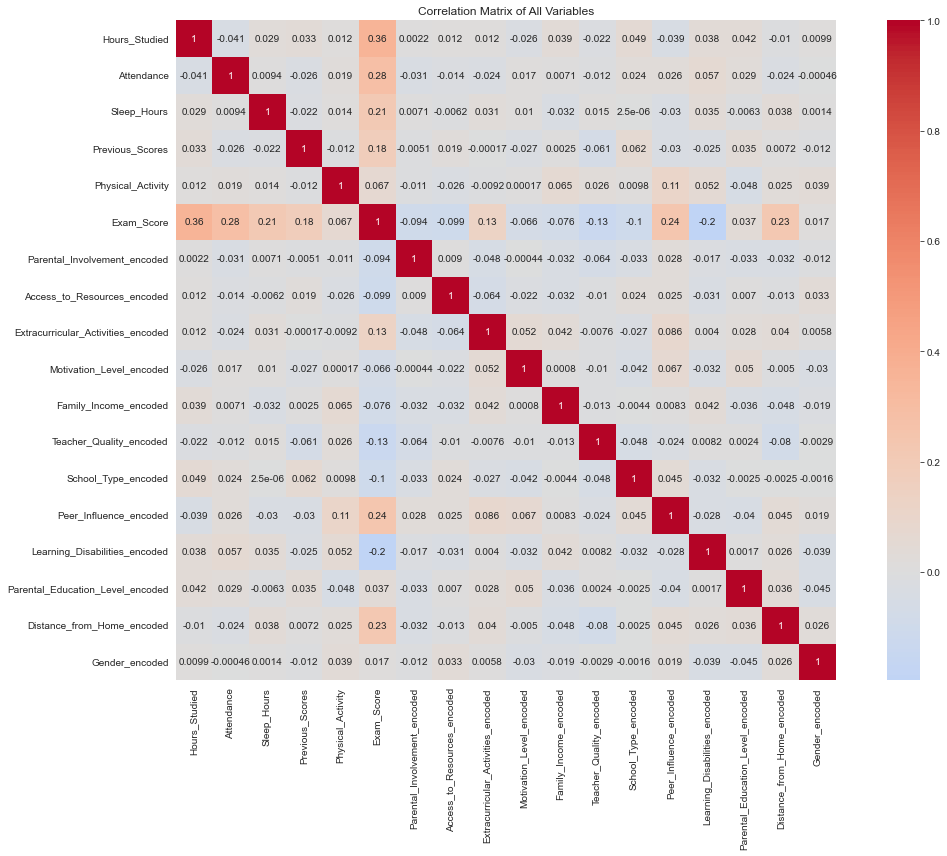

In [61]:
# Plot heatmap
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, annot= True,cmap='coolwarm', center=0, square=True)
plt.title('Correlation Matrix of All Variables')
plt.tight_layout()
plt.show()

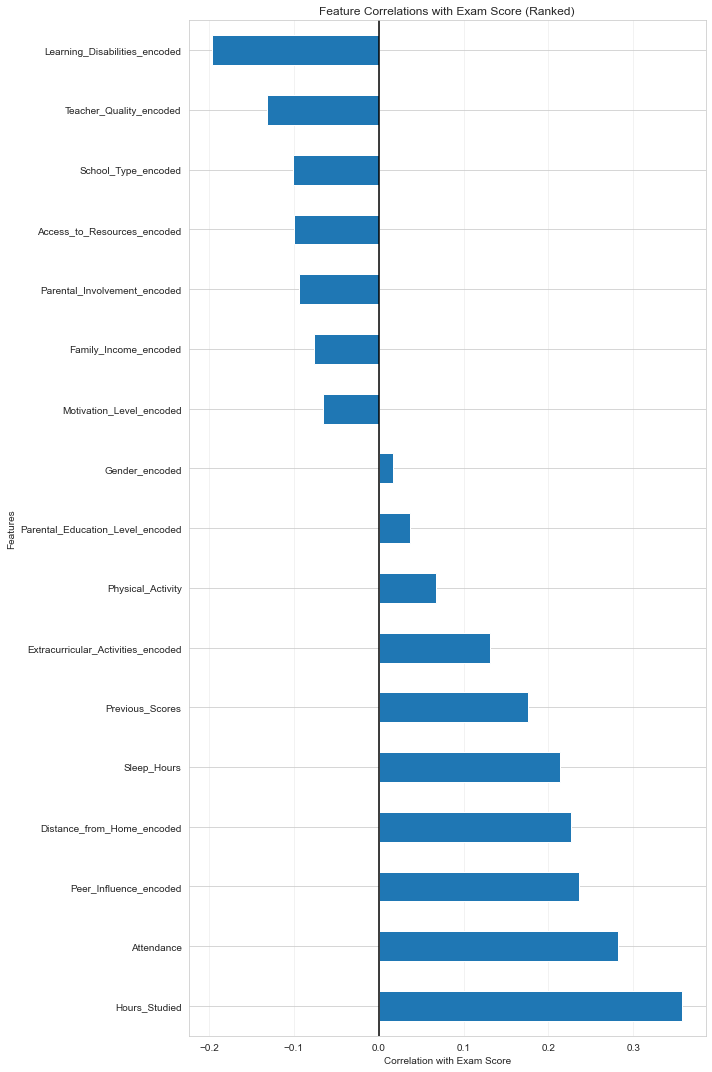

In [65]:
# Get Correlation with Exam_Score
exam_correlations = correlation_matrix['Exam_Score'].drop('Exam_Score').sort_values(ascending=False)
plt.figure(figsize=(10,15))
exam_correlations.plot(kind='barh')
plt.xlabel('Correlation with Exam Score')
plt.ylabel('Features')
plt.title('Feature Correlations with Exam Score (Ranked)')
plt.axvline(0, color='black')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [69]:
print("Top 10 Factors Affecting Student Success (By Correlation)")
for i, (factor, corr) in enumerate(exam_correlations.head(10).items(),1):
    clean_name= factor.replace('_encoded','')
    print(f"{i:2d}.{clean_name:35s}: {corr:+4f}")

Top 10 Factors Affecting Student Success (By Correlation)
 1.Hours_Studied                      : +0.357547
 2.Attendance                         : +0.282195
 3.Peer_Influence                     : +0.236354
 4.Distance_from_Home                 : +0.226792
 5.Sleep_Hours                        : +0.213104
 6.Previous_Scores                    : +0.175825
 7.Extracurricular_Activities         : +0.131286
 8.Physical_Activity                  : +0.067025
 9.Parental_Education_Level           : +0.036999
10.Gender                             : +0.017142


## Machine Learning Model 

In [70]:
# Prepare features for modeling

feature_cols = ['Hours_Studied','Attendance', 'Sleep_Hours','Previous_Scores','Physical_Activity'] + encoded_cols

X = df_encoded[feature_cols]
y = df_encoded['Exam_Score']


In [71]:
X

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Physical_Activity,Parental_Involvement_encoded,Access_to_Resources_encoded,Extracurricular_Activities_encoded,Motivation_Level_encoded,Family_Income_encoded,Teacher_Quality_encoded,School_Type_encoded,Peer_Influence_encoded,Learning_Disabilities_encoded,Parental_Education_Level_encoded,Distance_from_Home_encoded,Gender_encoded
0,39,88,9,65,5,0,2,1,0,1,2,1,2,0,1,2,1
1,29,55,4,77,3,2,1,1,0,0,2,1,2,0,2,0,0
2,15,55,8,77,3,2,2,1,2,0,0,1,2,0,0,2,1
3,43,52,7,93,1,2,1,0,2,2,2,1,0,0,0,1,1
4,8,56,4,83,1,2,0,1,1,2,2,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,33,94,5,88,6,1,0,1,2,1,0,1,1,0,1,0,0
996,2,72,9,42,1,2,0,1,2,0,2,0,1,0,0,2,0
997,14,96,7,49,6,1,2,0,2,0,2,0,1,0,0,2,0
998,40,80,4,44,0,2,0,0,2,0,1,1,2,0,0,1,0


In [72]:
y

0      100.0
1       92.1
2      100.0
3       78.5
4       74.7
       ...  
995     91.5
996     90.0
997     93.5
998     86.0
999    100.0
Name: Exam_Score, Length: 1000, dtype: float64

In [73]:
# Split Data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
X_train.shape

(800, 17)

In [76]:
X_test.shape

(200, 17)

In [77]:
y_train.shape

(800,)

In [78]:
y_test.shape

(200,)

### 1. Linear Regression Model

In [92]:
# Train Linear Regression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

#Predictions
y_pred_lr = lr_model.predict(X_test)

#Evaluate
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("MSE :", mse_lr)
print("MAE :", mae_lr)
print("R2 :", r2_lr)

MSE : 61.43570818337612
MAE : 77.93094518567258
R2 : -47.84468448781026


### 2. Random Forest Model 

In [91]:
# Train Random Forest 
rf_model= RandomForestRegressor(n_estimators=100,random_state=42,max_depth=15,min_samples_split=5)
rf_model.fit(X_train, y_train)

#Predictions
y_pred_rf = rf_model.predict(X_test)

#Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("MSE :", mse_rf)
print("MAE :", mae_rf)
print("R2 :", r2_rf)

MSE : 70.67265644153201
MAE : 77.93094518567258
R2 : -47.84468448781026


## Key Summary and Findings 

### Key Findings: Factors Affecting Student Success
Top 10 Factors Affecting Student Success (By Correlation)
 - 1.Hours_Studied                      : +0.357547
 - 2.Attendance                         : +0.282195
 - 3.Peer_Influence                     : +0.236354
 - 4.Distance_from_Home                 : +0.226792
 - 5.Sleep_Hours                        : +0.213104
 - 6.Previous_Scores                    : +0.175825
 - 7.Extracurricular_Activities         : +0.131286
 - 8.Physical_Activity                  : +0.067025
 - 9.Parental_Education_Level           : +0.036999
 -  10.Gender                            : +0.017142

### Actionable Recommendations

1. **For Students**
- Aim for 20-30 hours of focused stydy per week
- Target 90%+ attendance rate
- Get 7-8 hours of sleep per night for optimal performance
- Engange in regular physical activity
- Set clear goals and mantain high motibation levels
- Surround yourself with motivated, positive-influence peers

2. **For parents**
- Maintain active involvement in your child's education
- Provide resources : Ensure access to quality learning materials and technology
- Establish a conducive home study environmnet
- Regularly track academic performance and attendance
- Be a positive role model and mentor

3. **For Educators**
- Focus on professional development to improve teaching quality
- Identify struggling students early and proide support
- Support both academic and non-academic development

3. **For School and Policy-makers**
- Ensure all studnets have access to quality resources
- Invest in continous teacher professional development
- Provide counseling and support for at-risk studenets
- Offer programs to educate parents on supporting student learning



## Conclusion 

#### Student success is multifactorial, influenced by personal habits, famil support, school quality and socioeconomic factors. By addressing these factors holistically, we can significally improve academic outcomes for all students 